#Project: Deep Learning Committee for Fashion Classification (Fashion MNIST dataset).

## 0. Dataset:

Fashion MNIST: 60,000 training images and 10,000 testing images, each 28x28 pixels,
categorized into 10 clothing classes.

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the Fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [30]:
from sklearn.model_selection import train_test_split

# Print the shapes of the resulting sets
print("Training set:", X_train.shape, y_train.shape)
# print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)


## 1. Data Exploration & Preparation:


#### 1.1 Exploration: Visualize a sample of images from each class in the Fashion MNIST dataset.

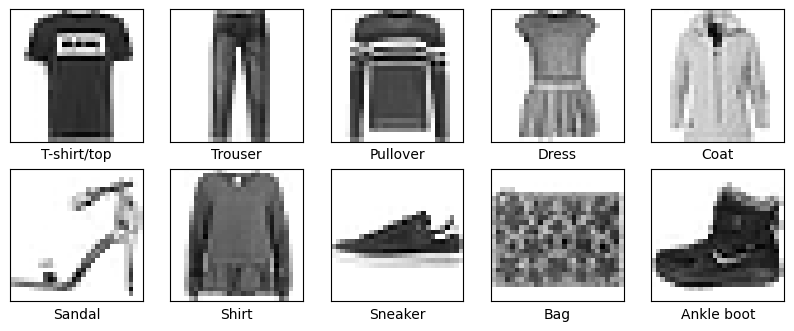

In [31]:
import matplotlib.pyplot as plt
import numpy as np
# Data Exploration
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    sample_images = X_train[y_train==i][0]
    plt.imshow(sample_images, cmap=plt.cm.binary)
    plt.xlabel(class_names[i])
plt.show()


#### 1.2 Normalization: Scale the images to have pixel values between [0,1].

In [32]:
# Normalize the images to [0, 1] range
X_train, X_test = X_train / 255.0, X_test / 255.0

print("Training set: {},{}".format(X_train.shape, y_train.shape))
# print("Validation set: {}, {}".format(X_val.shape, y_val.shape))
print("Test set: {}, {}".format(X_test.shape, y_test.shape))

# Print the minimum and maximum values in the normalized sets
print("\nNormalized Set Value Ranges:")

print("Training set: [{}, {}]".format(np.min(X_train), np.max(X_train)))
# print("Validation set: [{}, {}]".format(np.min(X_val), np.max(X_val)))
print("Test set: [{}, {}]".format(np.min(X_test), np.max(X_test)))




Training set: (60000, 28, 28),(60000,)
Test set: (10000, 28, 28), (10000,)

Normalized Set Value Ranges:
Training set: [0.0, 1.0]
Test set: [0.0, 1.0]


#### 1.3 Data Formatting: Convert labels to one-hot encoded vectors. Prepare data suitable for CNNs.

In [33]:
from keras.utils import to_categorical

# number of unique digits
nb_classes = np.unique(y_train)

# One hot encoding
y_train = to_categorical(y_train)
# y_val = to_categorical(y_val)
y_test = to_categorical(y_test)
y_train[0], y_test[0]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

1.4 Data Visualization: Creating a countplot for the categories

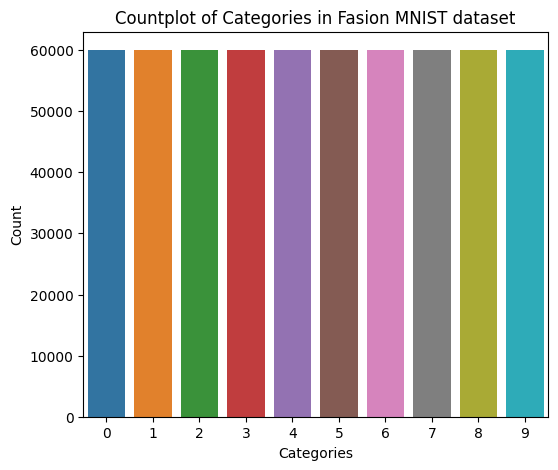

In [34]:
import seaborn as sns
plt.figure(figsize=(6,5))
sns.countplot(y_train)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Countplot of Categories in Fasion MNIST dataset')
plt.show()

We can see that all the catagories are equally distributed and balanced very well, so there is no need of data balancing.

1.5 Data Reshaping

In [35]:
X_train_reshaped = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis=-1)
X_train_gen, X_val, y_train, y_val = train_test_split(X_train_reshaped, y_train, test_size=0.2, random_state = 42)
X_test.shape

(10000, 28, 28, 1)

## 2. Models development

**With Dropout, BatchNormalization & Data Augmentation**

#### 2.1 Model 1: Design a shallow neural network. Explain the choice of layers and activations.


In [36]:
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Dense, Flatten


# Shallow Neural Network Model
model_1 = "Shallow_Neural_Network_Model"

shallow_neural_network_model = models.Sequential([
    # Input layer: Flatten the input images to 1D array
    layers.Flatten(input_shape=(28, 28)),

    # Hidden layer 1: Add a densely-connected layer with 256 neurons
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),  # Adding Dropout for regularization

    # Hidden layer 2: Add a densely-connected layer with 64 neurons
    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),  # Adding Dropout for regularization

    # Output layer: Add the output layer with 10 neurons for each class, using softmax activation
    layers.Dense(10, activation="softmax")
], name=model_1)

# Compilation the model
shallow_neural_network_model.compile(optimizer="adam",
                                     loss="categorical_crossentropy",  # Use categorical_crossentropy for one-hot encoded labels
                                     metrics=["accuracy"])

# Model's summary
shallow_neural_network_model.summary()
print('-------------')
model1 = Sequential()
model1.add(Flatten(input_shape=(28, 28, 1))) # Flatten layer to convert 28x28 image to 784-dimensional vector
model1.add(Dense(128, activation='relu')) # Hidden layer with 128 neurons and ReLU activation function
model1.add(Dense(10, activation='softmax')) # Output layer with 10 neurons (for 10 classes) and Softmax activation function



Model: "Shallow_Neural_Network_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization_12 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                16448     
                                                                 
 batch_normalization_13 (Ba  (None, 64)                256       
 tchNormalization)                    

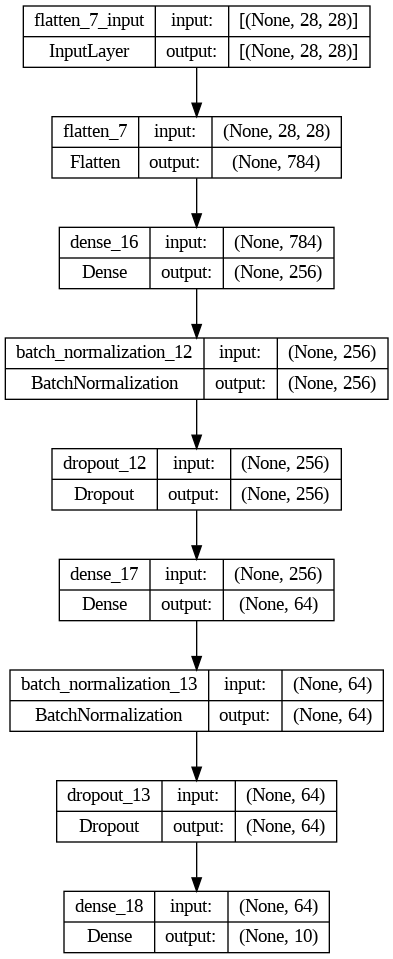

In [37]:
tf.keras.utils.plot_model(
    shallow_neural_network_model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None
)

#### 2.2 Model 2: Construct a basic convolutional neural network (CNN).

In [38]:
model_2 = "Convolutional_Neural_Network_Model"

# Basic Convolutional Neural Network (CNN)
cnn_model = models.Sequential([
    # Convolutional layer with 32 filters, each of size 3x3
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # MaxPooling layer to reduce spatial dimensions
    layers.MaxPooling2D((2, 2)),

    # Convolutional layer with 64 filters, each of size 3x3
    layers.Conv2D(64, (3, 3), activation='relu'),
    # MaxPooling layer to reduce spatial dimensions
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),

    # Flatten layer to convert 3D data to 1D
    layers.Flatten(),

    # Fully connected layer with 128 neurons
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # Output layer with 10 neurons for each class, using softmax activation
    layers.Dense(10, activation='softmax')
], name=model_2)

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',  # Use categorical_crossentropy for one-hot encoded labels
                  metrics=['accuracy'])

# Display the model summary
cnn_model.summary()


Model: "Convolutional_Neural_Network_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 flatten_9 (Flatten)         (No

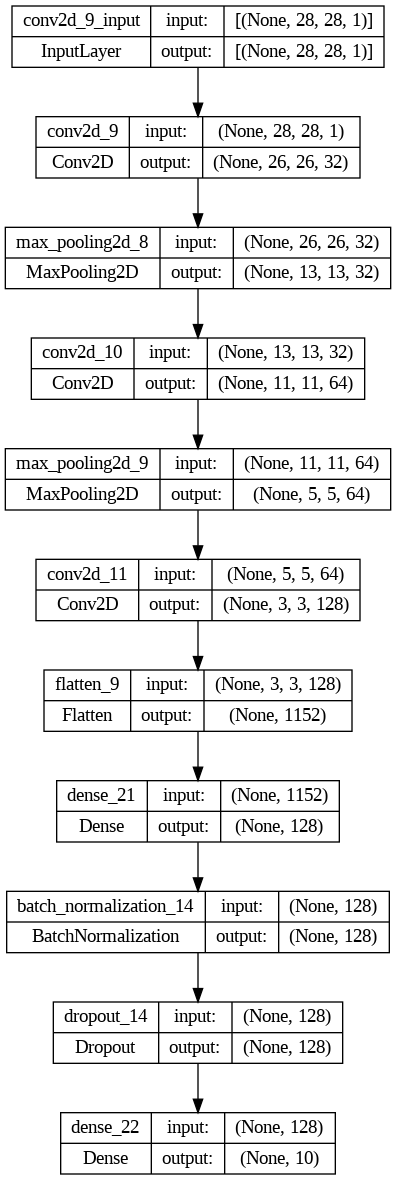

In [39]:
tf.keras.utils.plot_model(
    cnn_model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None
)

#### 2.3 Model 3: Build a deeper CNN, ensuring it’s architecturally different from Model 2.

In [40]:
# Custom name for the model
model_3 = "Deeper_Convolutional_Neural_Network_Model"

# Deeper Convolutional Neural Network (CNN)
deeper_cnn_model = models.Sequential([
    # Convolutional layer with 64 filters, each of size 3x3
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # MaxPooling layer to reduce spatial dimensions
    layers.MaxPooling2D((2, 2)),

    # Convolutional layer with 128 filters, each of size 3x3
    layers.Conv2D(128, (3, 3), activation='relu'),
    # MaxPooling layer to reduce spatial dimensions
    layers.MaxPooling2D((2, 2)),

    # Convolutional layer with 256 filters, each of size 3x3
    layers.Conv2D(256, (3, 3), activation='relu'),
    # MaxPooling layer to reduce spatial dimensions
    layers.MaxPooling2D((2, 2)),

    # Flatten layer to convert 3D data to 1D
    layers.Flatten(),

    # Fully connected layer with 256 neurons
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # Fully connected layer with 128 neurons
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # Output layer with 10 neurons for each class, using softmax activation
    layers.Dense(10, activation='softmax')
], name=model_3)

# Compile the deeper CNN model
deeper_cnn_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

# Display the model summary
deeper_cnn_model.summary()


Model: "Deeper_Convolutional_Neural_Network_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 256)         295168    
                                                                 
 max_pooling2d_12 (MaxPoo

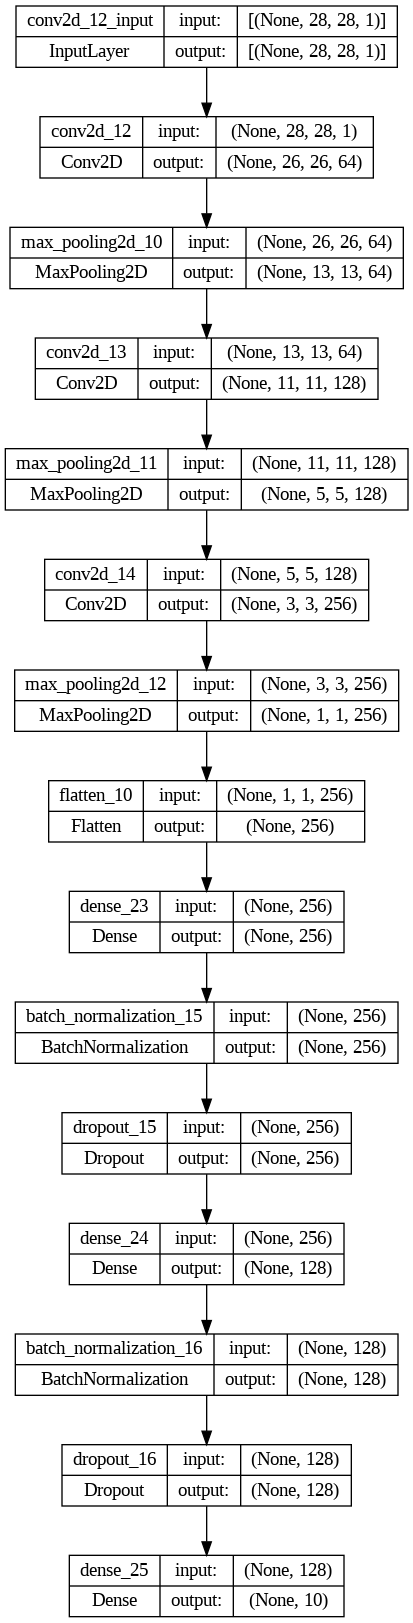

In [41]:
tf.keras.utils.plot_model(
    deeper_cnn_model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None
)

#### 2.4 Data Augmentation

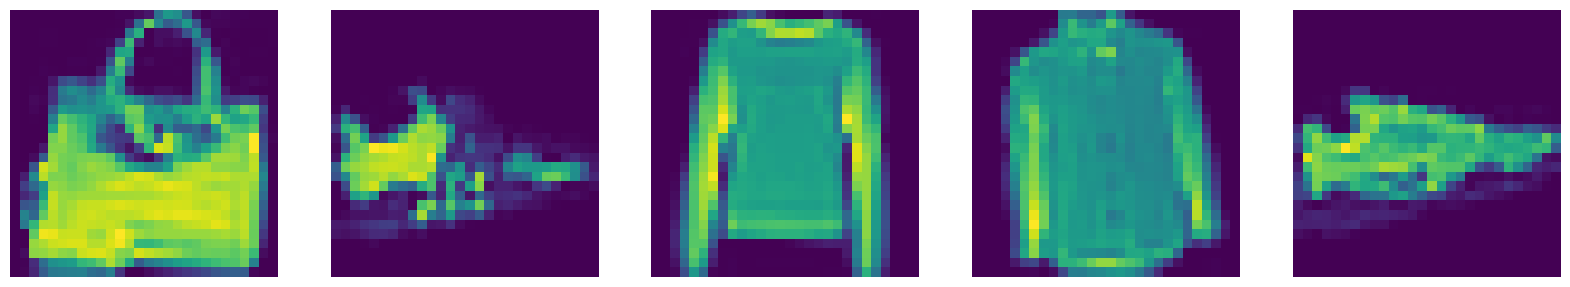

In [42]:
# Create data augmentation object
datagen = ImageDataGenerator(
    rotation_range= 20,
    horizontal_flip=True,
)
augment = datagen.flow(X_train_gen, batch_size=1)

for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.imshow(augment.next().squeeze())
    plt.axis('off')
plt.show()

## 3. Training & Validation:


In [43]:
  epochs = 10
  batch_size = 32
  # Fit the model to the data with data augmentation
  shallow_neural_network_model_results = shallow_neural_network_model.fit(
      datagen.flow(X_train_gen, y_train, batch_size= batch_size, shuffle=True),
      steps_per_epoch=len(X_train_gen) / batch_size,  # Number of batches per epoch
      epochs= epochs,
      validation_data=(X_val, y_val),
      validation_steps=len(X_val) / batch_size  # Number of batches for validation
  )
  # Fit the CNN model to the data with data augmentation
  cnn_model_results = cnn_model.fit(datagen.flow(X_train_gen, y_train, batch_size= batch_size, shuffle=True),
      steps_per_epoch=len(X_train_gen) / batch_size,  # Number of batches per epoch
      epochs= epochs,
      validation_data=(X_val, y_val),
      validation_steps=len(X_val) / batch_size  # Number of batches for validation
  )
  # Fit the DEEPER CNN model to the data with data augmentation
  deeper_cnn_model_results = deeper_cnn_model.fit(
      datagen.flow(X_train_gen, y_train, batch_size= batch_size, shuffle=True),
      steps_per_epoch=len(X_train_gen) / batch_size,  # Number of batches per epoch
      epochs= epochs,
      validation_data=(X_val, y_val),
      validation_steps=len(X_val) / batch_size  # Number of batches for validation
  )

Epoch 1/10
1500/1500 [==============================] - 28s 18ms/step - loss: 0.7528 - accuracy: 0.7322 - val_loss: 0.5464 - val_accuracy: 0.8012
Epoch 2/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.6230 - accuracy: 0.7741 - val_loss: 0.5230 - val_accuracy: 0.8097
Epoch 3/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.5848 - accuracy: 0.7878 - val_loss: 0.5081 - val_accuracy: 0.8133
Epoch 4/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.5640 - accuracy: 0.7951 - val_loss: 0.4759 - val_accuracy: 0.8204
Epoch 5/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.5537 - accuracy: 0.7991 - val_loss: 0.5141 - val_accuracy: 0.8108
Epoch 6/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.5387 - accuracy: 0.8037 - val_loss: 0.4842 - val_accuracy: 0.8302
Epoch 7/10
1500/1500 [==============================] - 25s 16ms/step - loss: 0.5264 - accuracy: 0.8071 - val_loss: 0.4413 -

**METHOD 2**

In [44]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the images to be suitable for a CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Now your train and test sets should match correctly
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# Compile and train Model 1
shallow_neural_network_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history1 = shallow_neural_network_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Compile and train Model 2
cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history2 = cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Compile and train Model 3
deeper_cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history3 = deeper_cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Optionally save the model weights
shallow_neural_network_model.save_weights('model1_weights.h5')
cnn_model.save_weights('model2_weights.h5')
deeper_cnn_model.save_weights('model3_weights.h5')


(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)
Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.4430 - accuracy: 0.8394 - val_loss: 0.4142 - val_accuracy: 0.8503
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4038 - accuracy: 0.8547 - val_loss: 0.3822 - val_accuracy: 0.8615
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3827 - accuracy: 0.8613 - val_loss: 0.4052 - val_accuracy: 0.8539
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3679 - accuracy: 0.8668 - val_loss: 0.3733 - val_accuracy: 0.8666
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3595 - accuracy: 0.8704 - val_loss: 0.3486 - val_accuracy: 0.8757
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3574 - accuracy: 0.8708 - val_loss: 0.3593 - val_accuracy: 0.8678
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step

3rd Method to Train and Validate. Here the metrics are plotted and the best weights are saved.

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.3300 - accuracy: 0.8773 - val_loss: 0.3357 - val_accuracy: 0.8794
Epoch 2/10
  19/1875 [..............................] - ETA: 11s - loss: 0.4397 - accuracy: 0.8421

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 14s 8ms/step - loss: 0.3297 - accuracy: 0.8784 - val_loss: 0.3455 - val_accuracy: 0.8758
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3238 - accuracy: 0.8817 - val_loss: 0.3366 - val_accuracy: 0.8811
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3187 - accuracy: 0.8834 - val_loss: 0.3379 - val_accuracy: 0.8763
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3126 - accuracy: 0.8849 - val_loss: 0.3463 - val_accuracy: 0.8754
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3121 - accuracy: 0.8851 - val_loss: 0.3379 - val_accuracy: 0.8777
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3107 - accuracy: 0.8853 - val_loss: 0.3303 - val_accuracy: 0.8801
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3104 - accuracy: 0.8862 - val_loss: 0.3285 - val_accuracy: 0.8

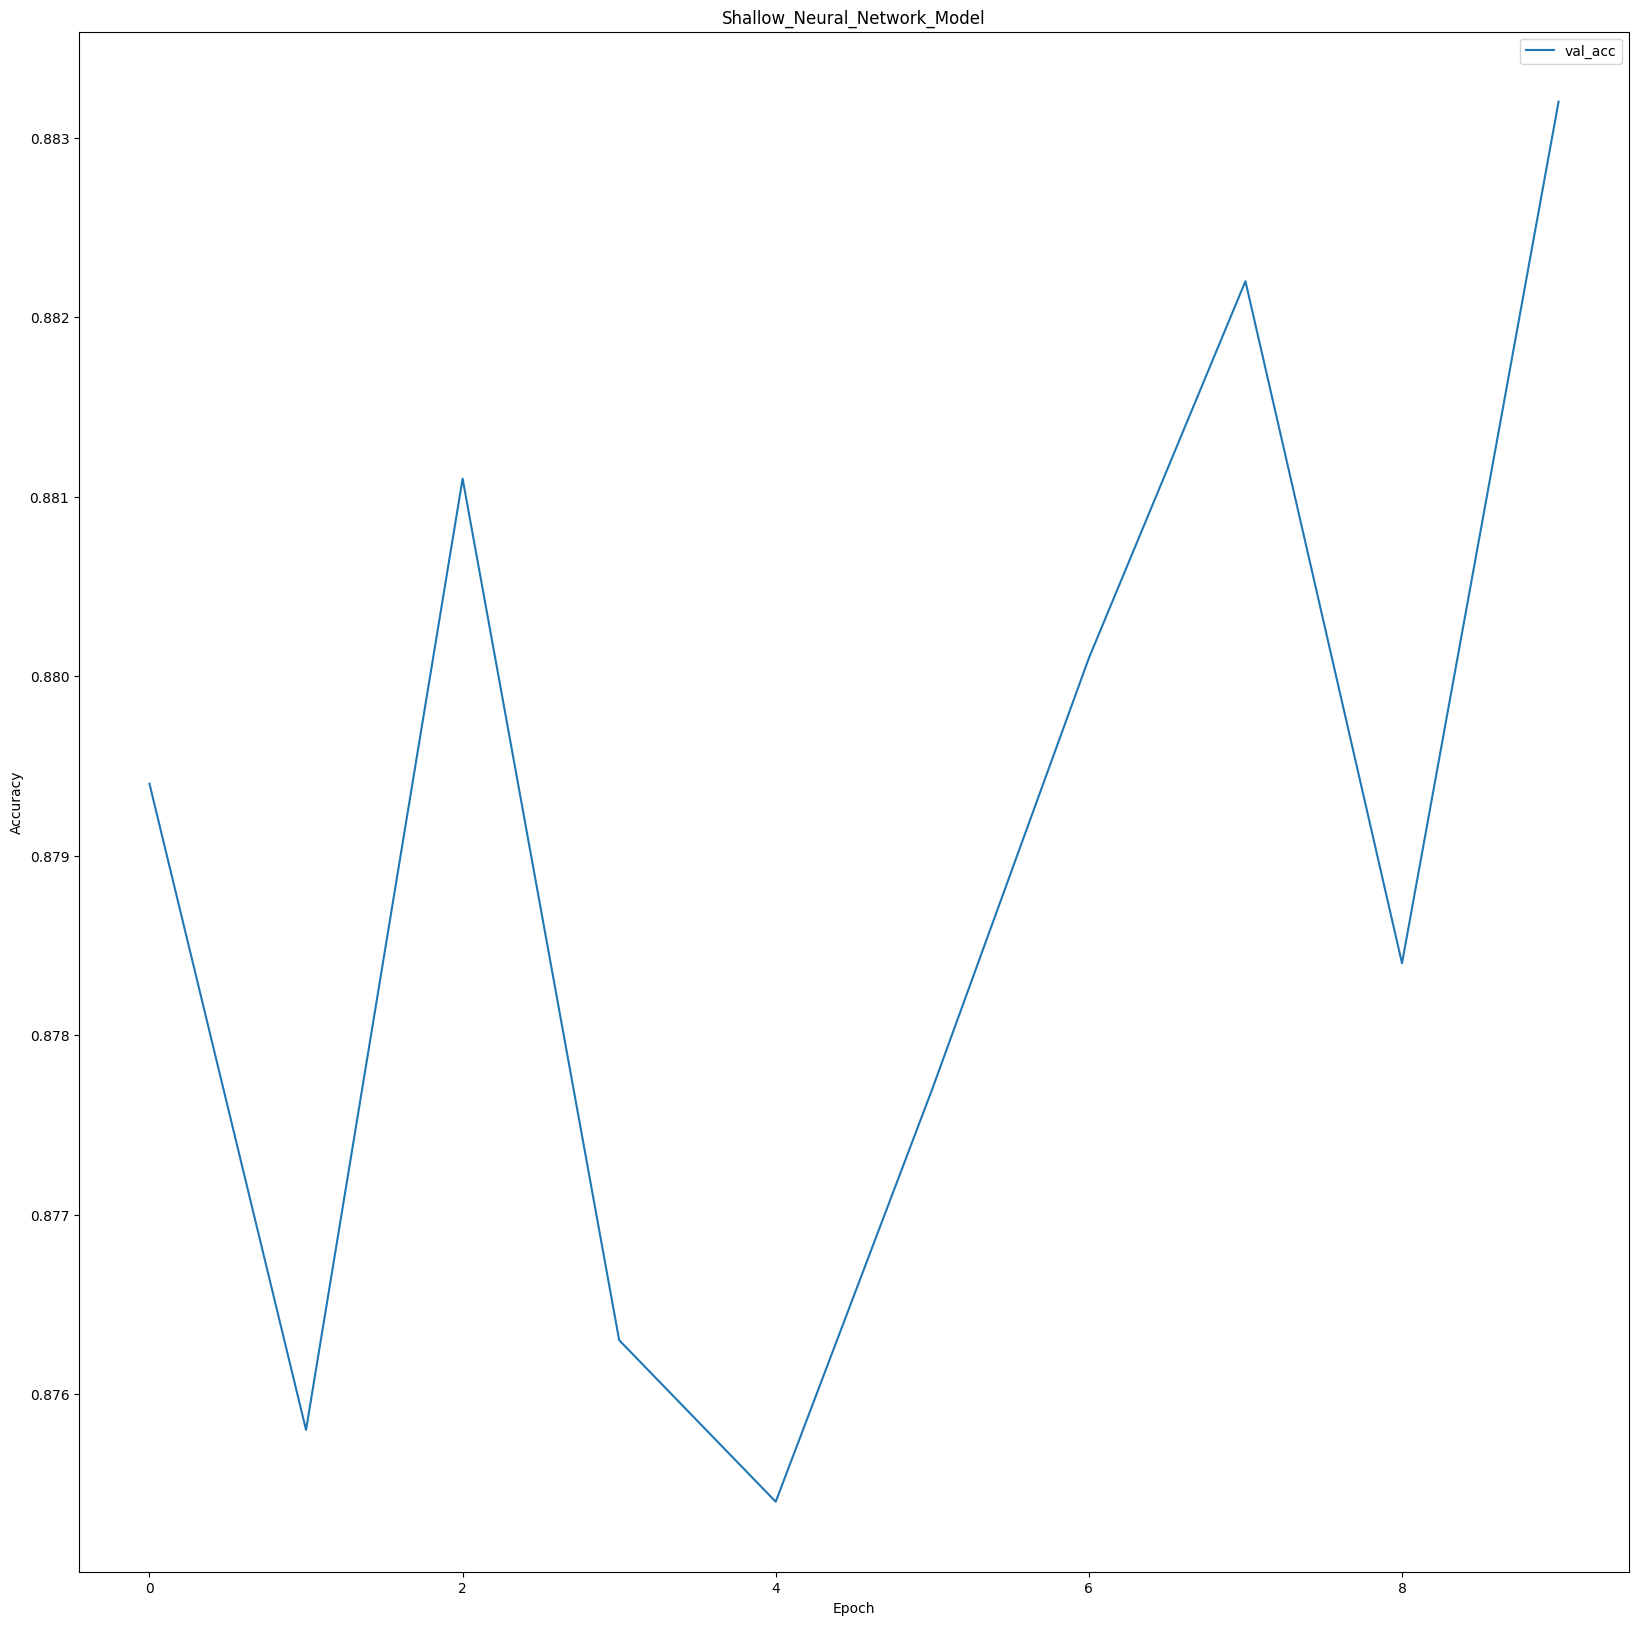

Epoch 1/10
1875/1875 [==============================] - 73s 38ms/step - loss: 0.1231 - accuracy: 0.9557 - val_loss: 0.2730 - val_accuracy: 0.9178
Epoch 2/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1127 - accuracy: 0.9599 - val_loss: 0.3074 - val_accuracy: 0.9074
Epoch 3/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1065 - accuracy: 0.9620 - val_loss: 0.2841 - val_accuracy: 0.9147
Epoch 4/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0984 - accuracy: 0.9638 - val_loss: 0.3207 - val_accuracy: 0.9109
Epoch 5/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0947 - accuracy: 0.9653 - val_loss: 0.3418 - val_accuracy: 0.9094
Epoch 6/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0871 - accuracy: 0.9682 - val_loss: 0.3286 - val_accuracy: 0.9164
Epoch 7/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0822 - accuracy: 0.9697 - val_loss: 0.3255 -

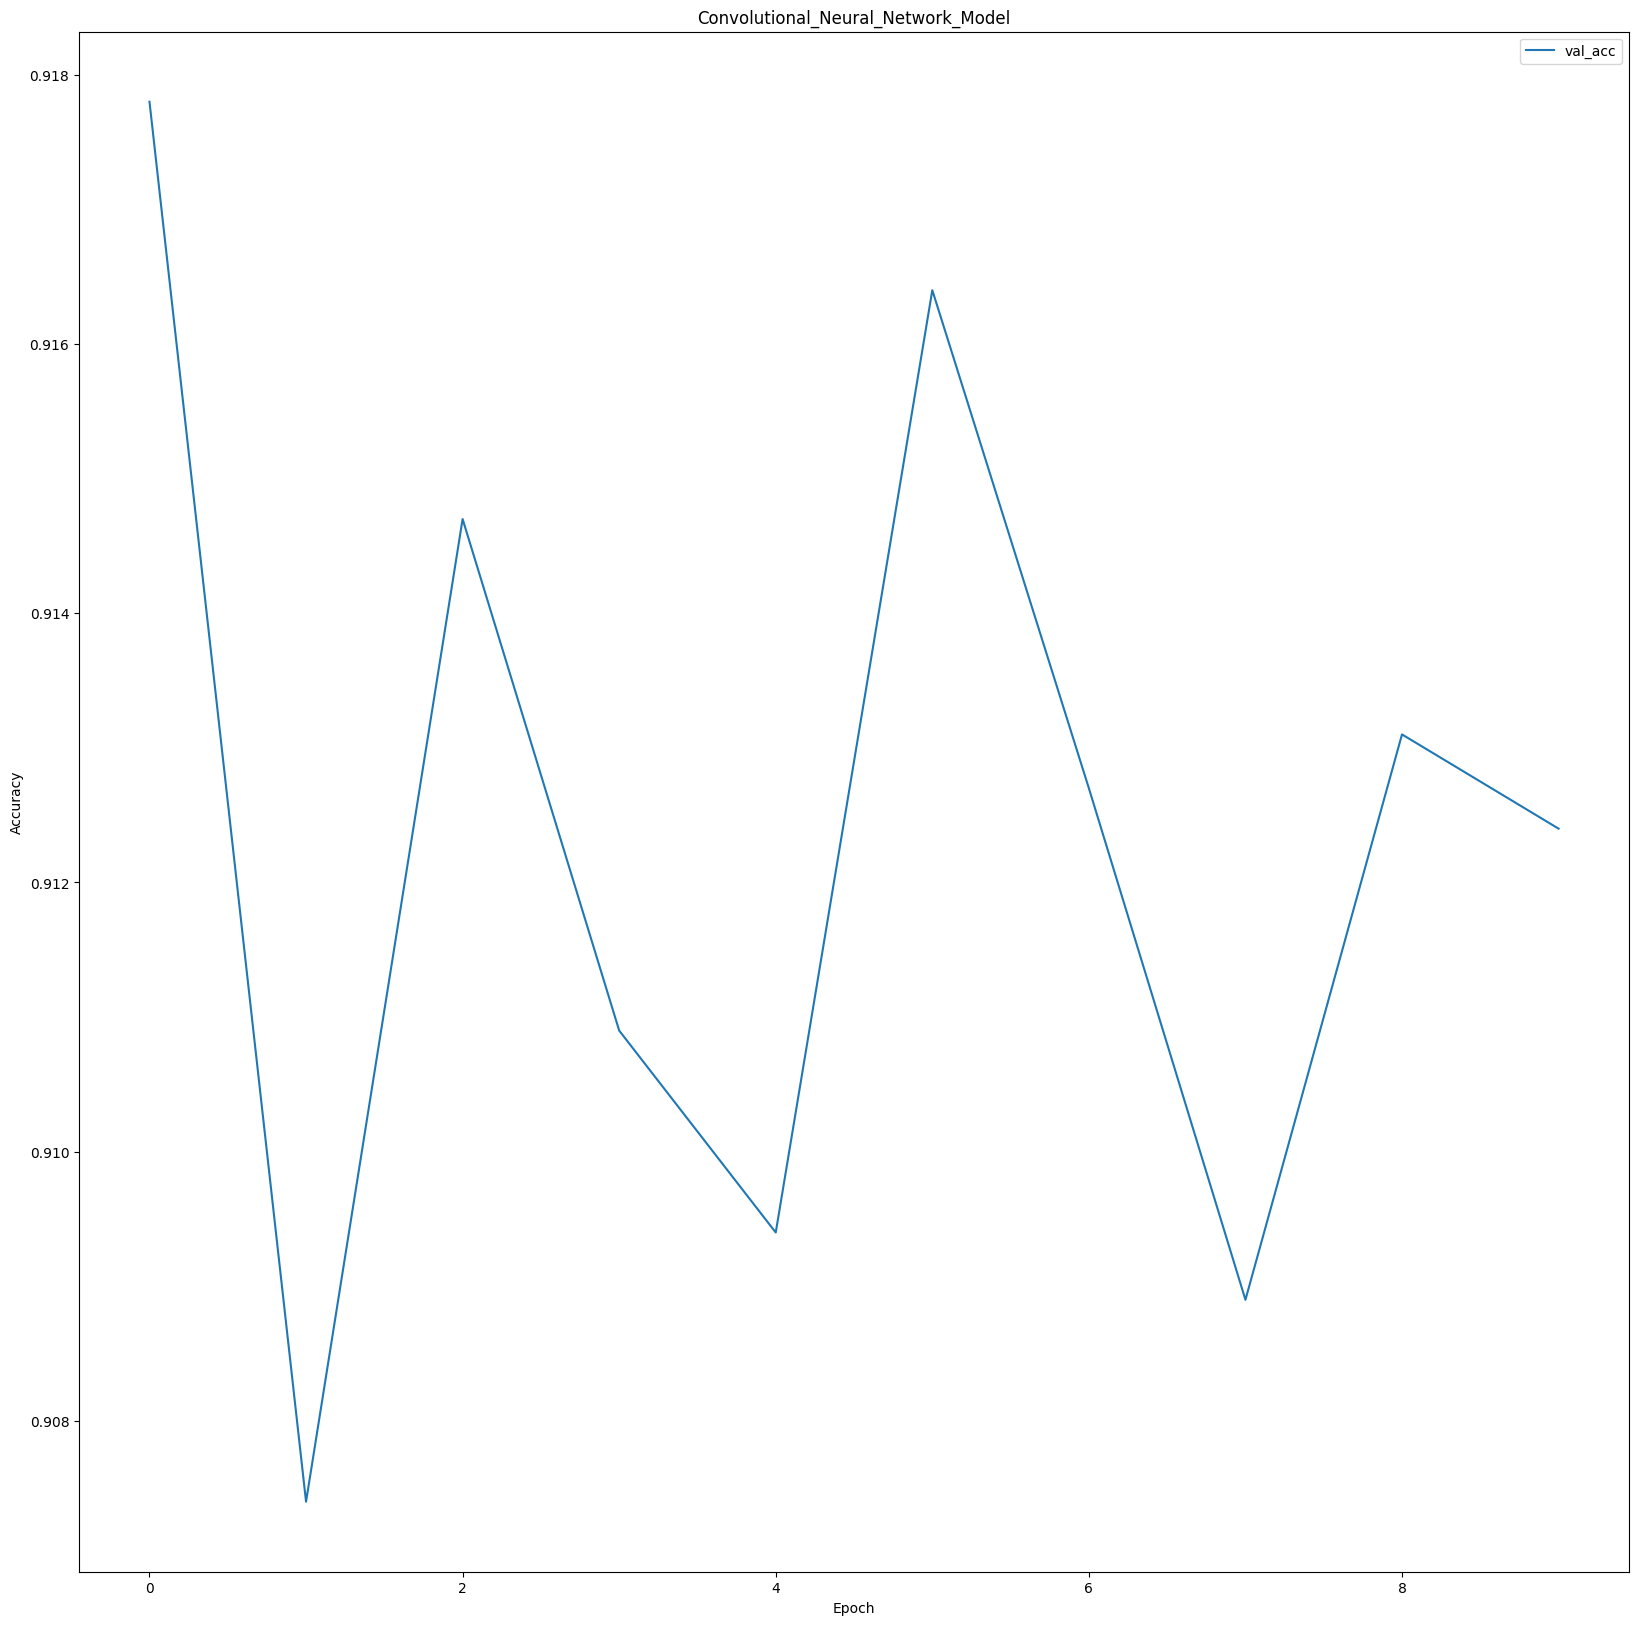

Epoch 1/10
1875/1875 [==============================] - 195s 103ms/step - loss: 0.1330 - accuracy: 0.9538 - val_loss: 0.3409 - val_accuracy: 0.8994
Epoch 2/10
1875/1875 [==============================] - 195s 104ms/step - loss: 0.1200 - accuracy: 0.9578 - val_loss: 0.3708 - val_accuracy: 0.8996
Epoch 3/10
1875/1875 [==============================] - 190s 101ms/step - loss: 0.1114 - accuracy: 0.9617 - val_loss: 0.3927 - val_accuracy: 0.9017
Epoch 4/10
1875/1875 [==============================] - 194s 104ms/step - loss: 0.1066 - accuracy: 0.9625 - val_loss: 0.3791 - val_accuracy: 0.9011
Epoch 5/10
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0982 - accuracy: 0.9658 - val_loss: 0.3918 - val_accuracy: 0.8998
Epoch 6/10
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0903 - accuracy: 0.9682 - val_loss: 0.3725 - val_accuracy: 0.9035
Epoch 7/10
1875/1875 [==============================] - 193s 103ms/step - loss: 0.0851 - accuracy: 0.9706 - val_

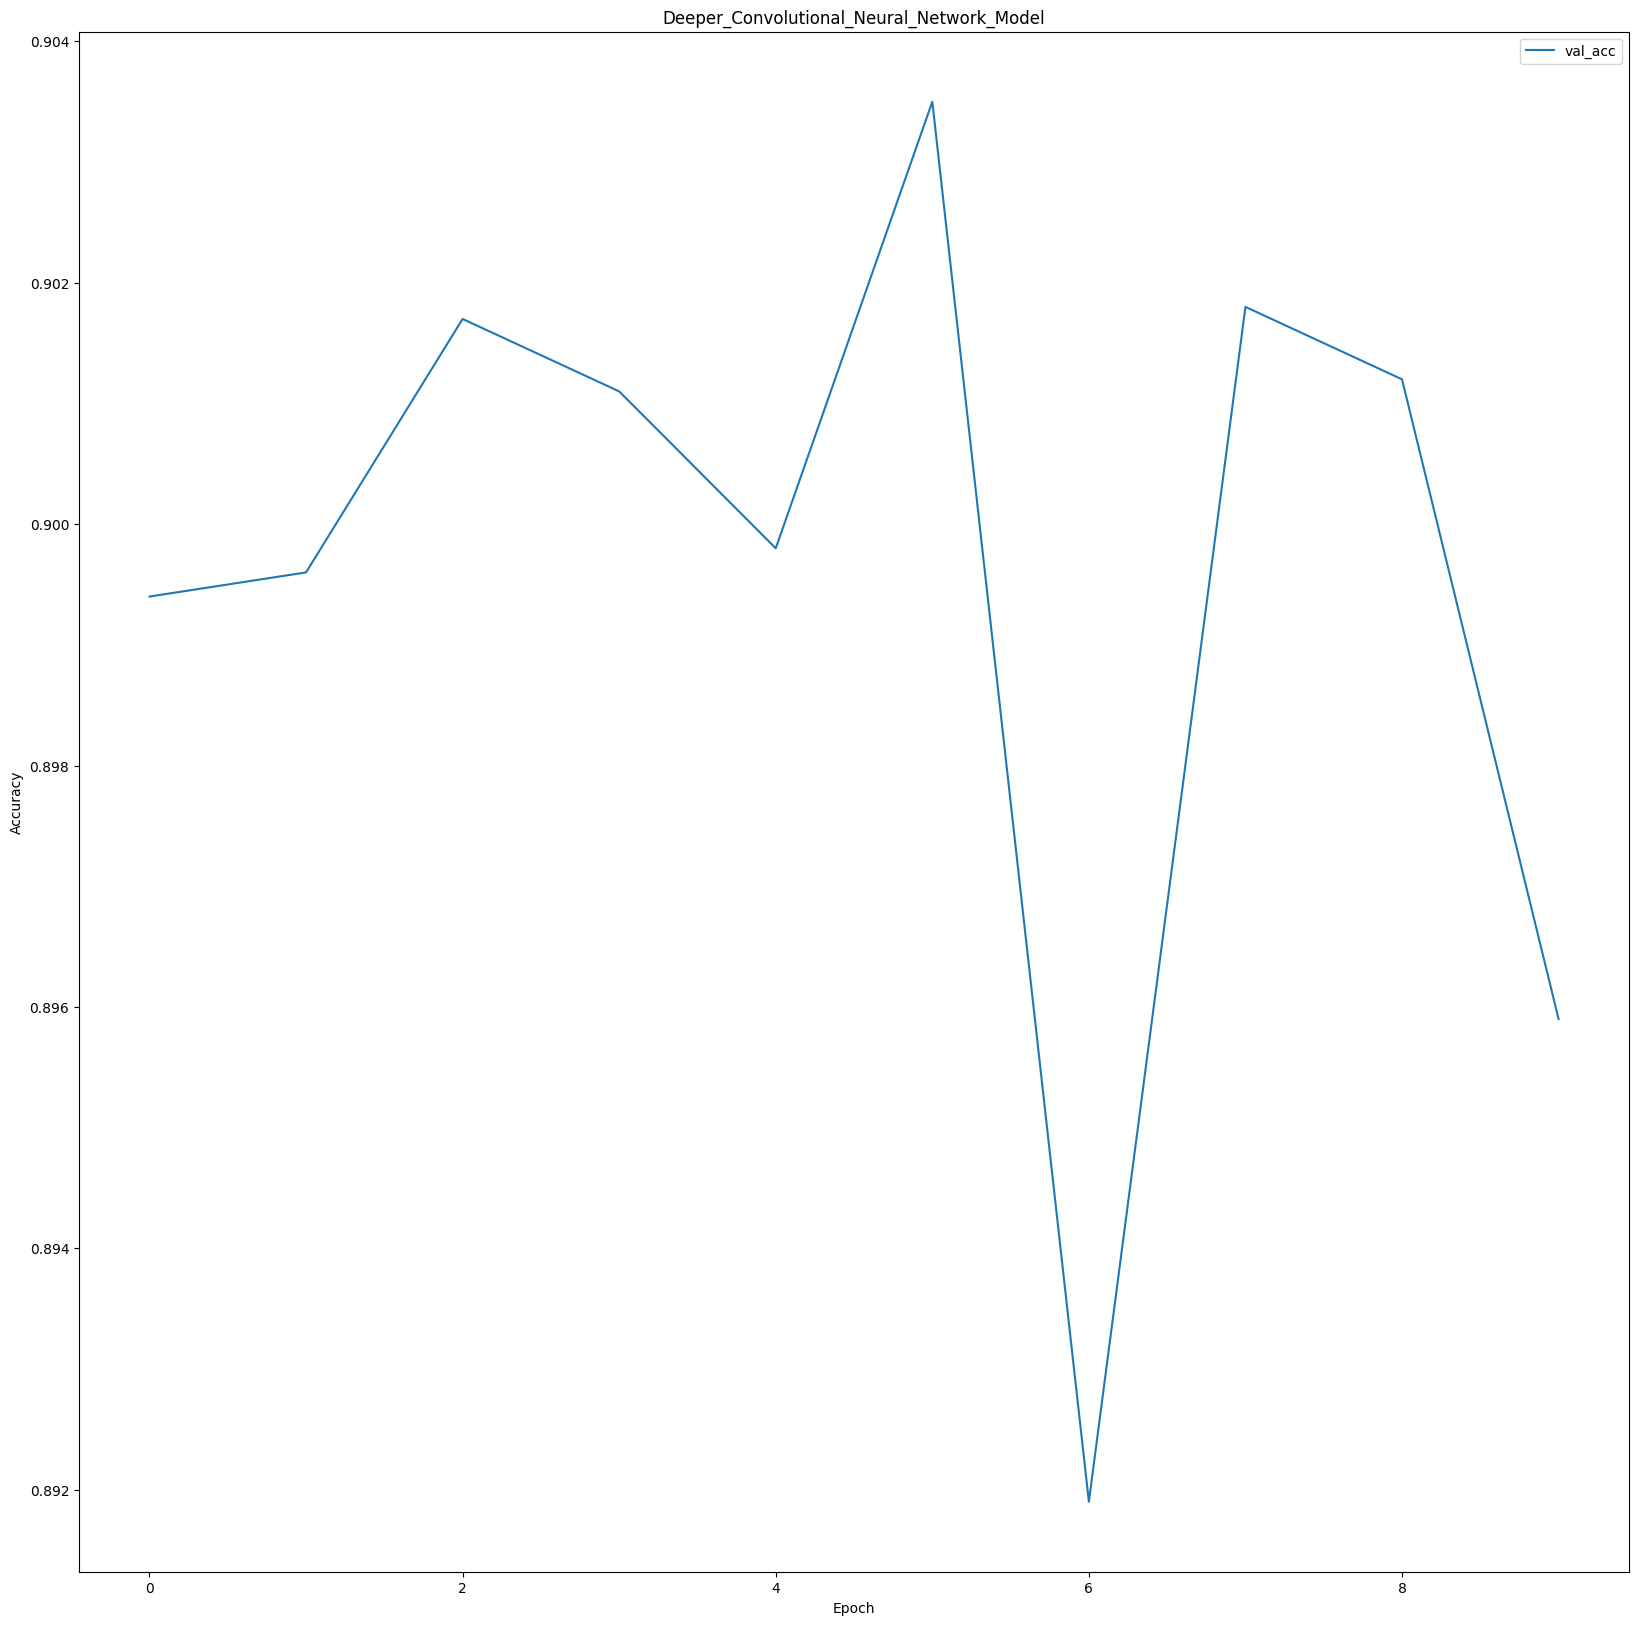

In [45]:
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
# Train each model
models = [
    (shallow_neural_network_model, 'shallow_neural_network_model'),
    (cnn_model, 'cnn_model'),
    (deeper_cnn_model, 'deeper_cnn_model')
]

for model, name in models:

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  # Define a ModelCheckpoint callback to save the best weights
  checkpoint = ModelCheckpoint('best_weights_{}.h5'.format(name),
                                 save_best_only=True,
                                 monitor='val_loss',
                                 mode='min')

  history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10,callbacks=[checkpoint])

  # Print metrics
  print(model.evaluate(X_test, y_test))

  # Plot metrics
  plt.plot(history.history['val_accuracy'], label='val_acc')
  plt.title(model.name)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend()
  plt.show()



## 4. Model Evaluation:

#### 4.1 Plotting model training curves to better understand how our model performed

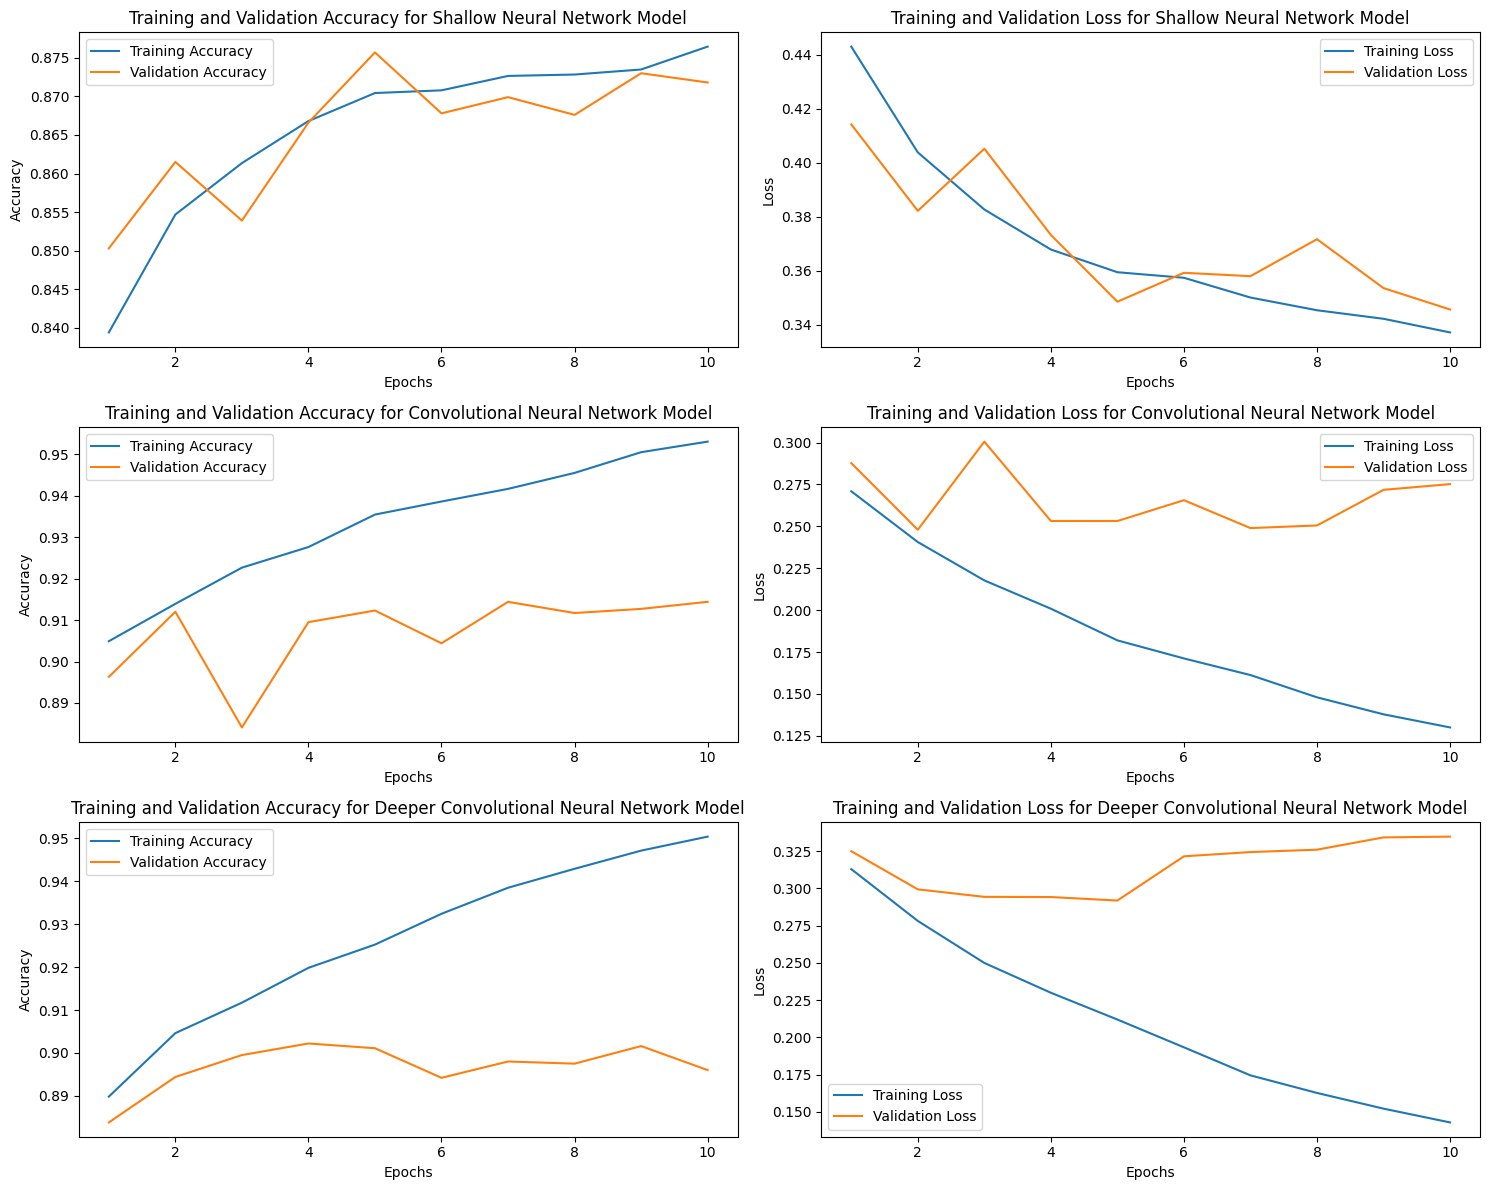

In [46]:
# Function to plot the training history
def plot_training_history(ax, acc, val_acc, loss, val_loss, title):
    epochs = list(range(1, len(acc) + 1))

    # Plotting accuracy
    ax[0].plot(epochs, acc, label='Training Accuracy')
    ax[0].plot(epochs, val_acc, label='Validation Accuracy')
    ax[0].set_title(f'Training and Validation Accuracy for {title}')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()

    # Plotting loss
    ax[1].plot(epochs, loss, label='Training Loss')
    ax[1].plot(epochs, val_loss, label='Validation Loss')
    ax[1].set_title(f'Training and Validation Loss for {title}')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend()

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

hist = history1.history
acc = hist['accuracy']
val_acc = hist['val_accuracy']
loss = hist['loss']
val_loss = hist['val_loss']
epochs = list(range(1, len(acc) + 1))
# Plotting for the shallow neural network model
plot_training_history(axs[0], acc, val_acc, loss, val_loss, 'Shallow Neural Network Model')

# Extracting training history
hist = history2.history
acc = hist['accuracy']
val_acc = hist['val_accuracy']
loss = hist['loss']
val_loss = hist['val_loss']
epochs = list(range(1, len(acc) + 1))
# Plotting for the convolutional neural network model
plot_training_history(axs[1], acc, val_acc, loss, val_loss, 'Convolutional Neural Network Model')

# Extracting training history
hist = history3.history
acc = hist['accuracy']
val_acc = hist['val_accuracy']
loss = hist['loss']
val_loss = hist['val_loss']
epochs = list(range(1, len(acc) + 1))

# Plotting for the deeper convolutional neural network model
plot_training_history(axs[2], acc, val_acc, loss, val_loss, 'Deeper Convolutional Neural Network Model')

plt.tight_layout()
plt.show()


#### 4.2 Creating the committee for model to pick the higher confidence model's value

In [47]:
# Evaluate model_1
accuracy_model_1 = shallow_neural_network_model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Accuracy for {shallow_neural_network_model.name}: {accuracy_model_1:.4f}")

# Evaluate model_2
accuracy_model_2 = cnn_model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Accuracy for {cnn_model.name}: {accuracy_model_2:.4f}")

# Evaluate model_3
accuracy_model_3 = deeper_cnn_model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Accuracy for {deeper_cnn_model.name}: {accuracy_model_3:.4f}")

# Create a committee by averaging predictions
committee_predictions = (shallow_neural_network_model.predict(X_test) + cnn_model.predict(X_test) + deeper_cnn_model.predict(X_test)) / 3

# Convert committee predictions to class labels
committee_labels = np.argmax(committee_predictions, axis=1)

# Evaluate committee accuracy
committee_accuracy = np.mean(committee_labels == np.argmax(y_test, axis=1))
print(f"Combined accuracy for the committee: {committee_accuracy:.4f}")
# Create a committee by averaging predictions
committee_predictions = (shallow_neural_network_model.predict(X_test) + cnn_model.predict(X_test) + deeper_cnn_model.predict(X_test)) / 3
# Convert committee predictions to class labels
committee_labels = np.argmax(committee_predictions, axis=1)

# Evaluate committee accuracy
committee_accuracy = np.mean(committee_labels == np.argmax(y_test, axis=1))
print(f"Combined accuracy for the committee: {committee_accuracy:.4f}")


Accuracy for Shallow_Neural_Network_Model: 0.8832
Accuracy for Convolutional_Neural_Network_Model: 0.9124
Accuracy for Deeper_Convolutional_Neural_Network_Model: 0.8959
313/313 [==============================] - 7s 21ms/step
Combined accuracy for the committee: 0.9228
313/313 [==============================] - 6s 20ms/step
Combined accuracy for the committee: 0.9228


## 5. Performance Metrics & Analysis:
#### 5.1 Generating and visualizing confusion matrices for each model and the committee. and also classification reports, comparing precision, recall, and F1-scores.

313/313 [==============================] - 8s 25ms/step


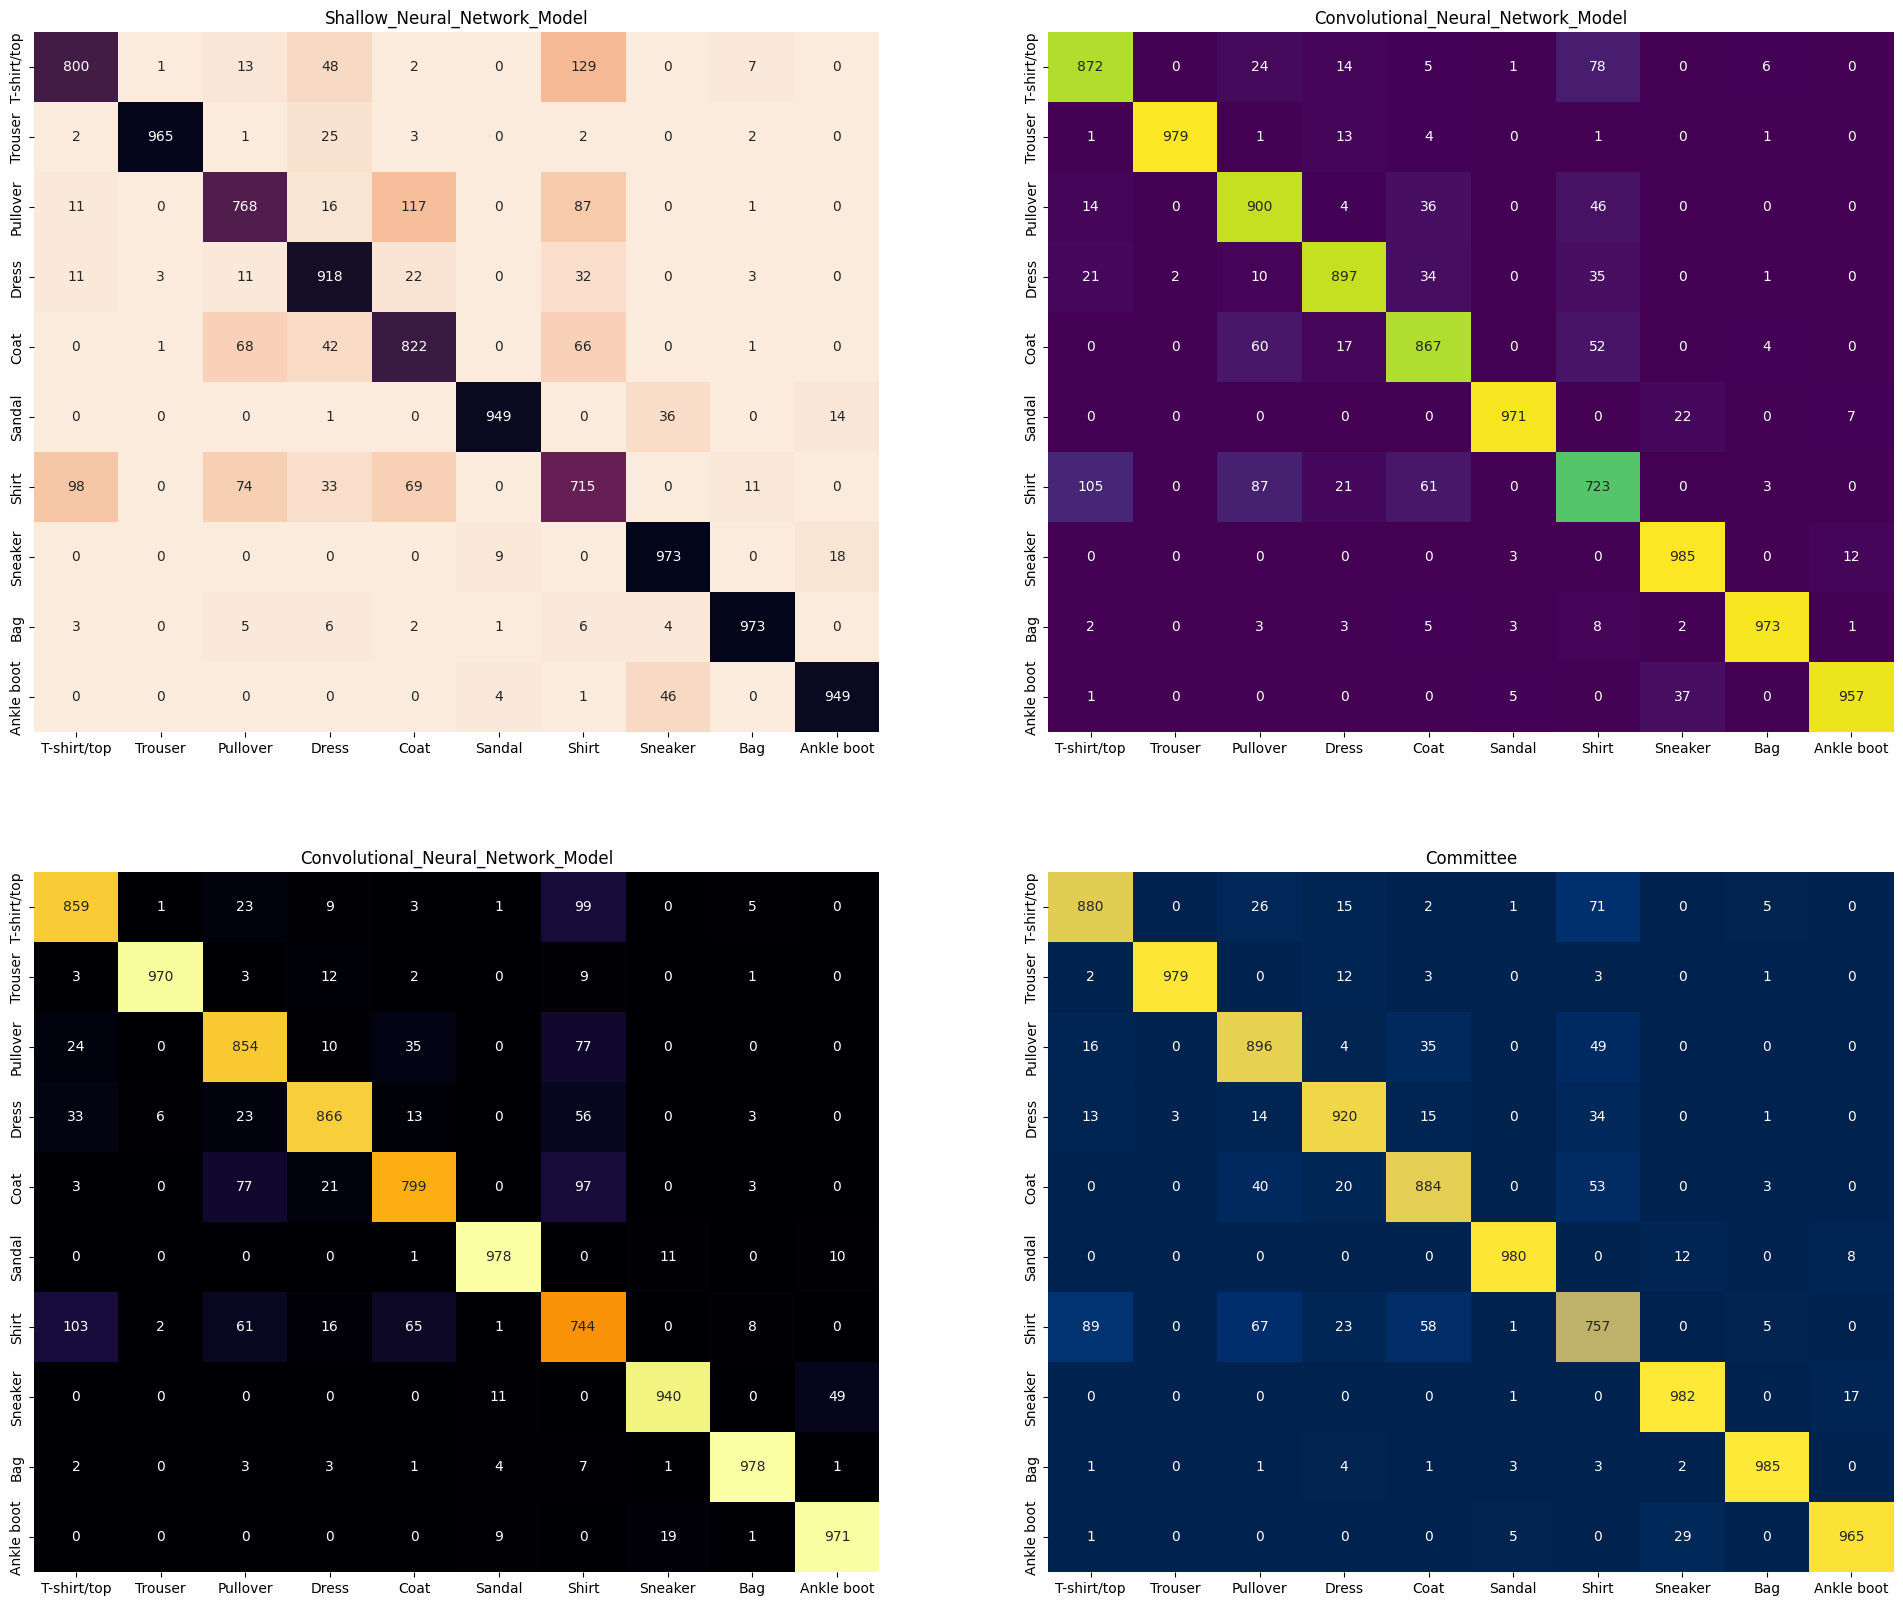

Classification Report for Shallow_Neural_Network_Model
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.82      0.77      0.79      1000
           3       0.84      0.92      0.88      1000
           4       0.79      0.82      0.81      1000
           5       0.99      0.95      0.97      1000
           6       0.69      0.71      0.70      1000
           7       0.92      0.97      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Classification Report for Convolutional_Neural_Network_Model
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1000
           1   

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Get predictions for each model
predictions_model_1 = shallow_neural_network_model.predict(X_test)
predictions_model_2 = cnn_model.predict(X_test)
predictions_model_3 = deeper_cnn_model.predict(X_test)

# Convert predictions to class labels
labels_model_1 = np.argmax(predictions_model_1, axis=1)
labels_model_2 = np.argmax(predictions_model_2, axis=1)
labels_model_3 = np.argmax(predictions_model_3, axis=1)

# Confusion matrices
conf_matrix_model_1 = confusion_matrix(np.argmax(y_test, axis=1), labels_model_1)
conf_matrix_model_2 = confusion_matrix(np.argmax(y_test, axis=1), labels_model_2)
conf_matrix_model_3 = confusion_matrix(np.argmax(y_test, axis=1), labels_model_3)

# Confusion matrix for the committee
conf_matrix_committee = confusion_matrix(np.argmax(y_test, axis=1), committee_labels)

# Classification reports
class_report_model_1 = classification_report(np.argmax(y_test, axis=1), labels_model_1)
class_report_model_2 = classification_report(np.argmax(y_test, axis=1), labels_model_2)
class_report_model_3 = classification_report(np.argmax(y_test, axis=1), labels_model_3)

# Classification report for the committee
class_report_committee = classification_report(np.argmax(y_test, axis=1), committee_labels)

# Plot confusion matrices
plt.figure(figsize=(24, 20))
plt.subplot(2, 2, 1)
sns.heatmap(conf_matrix_model_1, annot=True, fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names, cmap='rocket_r')
plt.title(shallow_neural_network_model.name)

plt.subplot(2, 2, 2)
sns.heatmap(conf_matrix_model_2, annot=True, fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names, cmap='viridis')
plt.title(cnn_model.name)

plt.subplot(2, 2, 3)
sns.heatmap(conf_matrix_model_3, annot=True, fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names, cmap='inferno')
plt.title(cnn_model.name)

plt.subplot(2, 2, 4)
sns.heatmap(conf_matrix_committee, annot=True, fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names, cmap='cividis')
plt.title('Committee')

# plt.tight_layout()
plt.show()

# Print classification reports
print("Classification Report for", shallow_neural_network_model.name)
print(class_report_model_1)

print("\nClassification Report for", cnn_model.name)
print(class_report_model_2)

print("\nClassification Report for", deeper_cnn_model.name)
print(class_report_model_3)

print("\nClassification Report for the Committee:")
print(class_report_committee)


#### 5.2 Visualizing the predictions on all the classes using all models

1/1 [==============================] - 0s 23ms/step


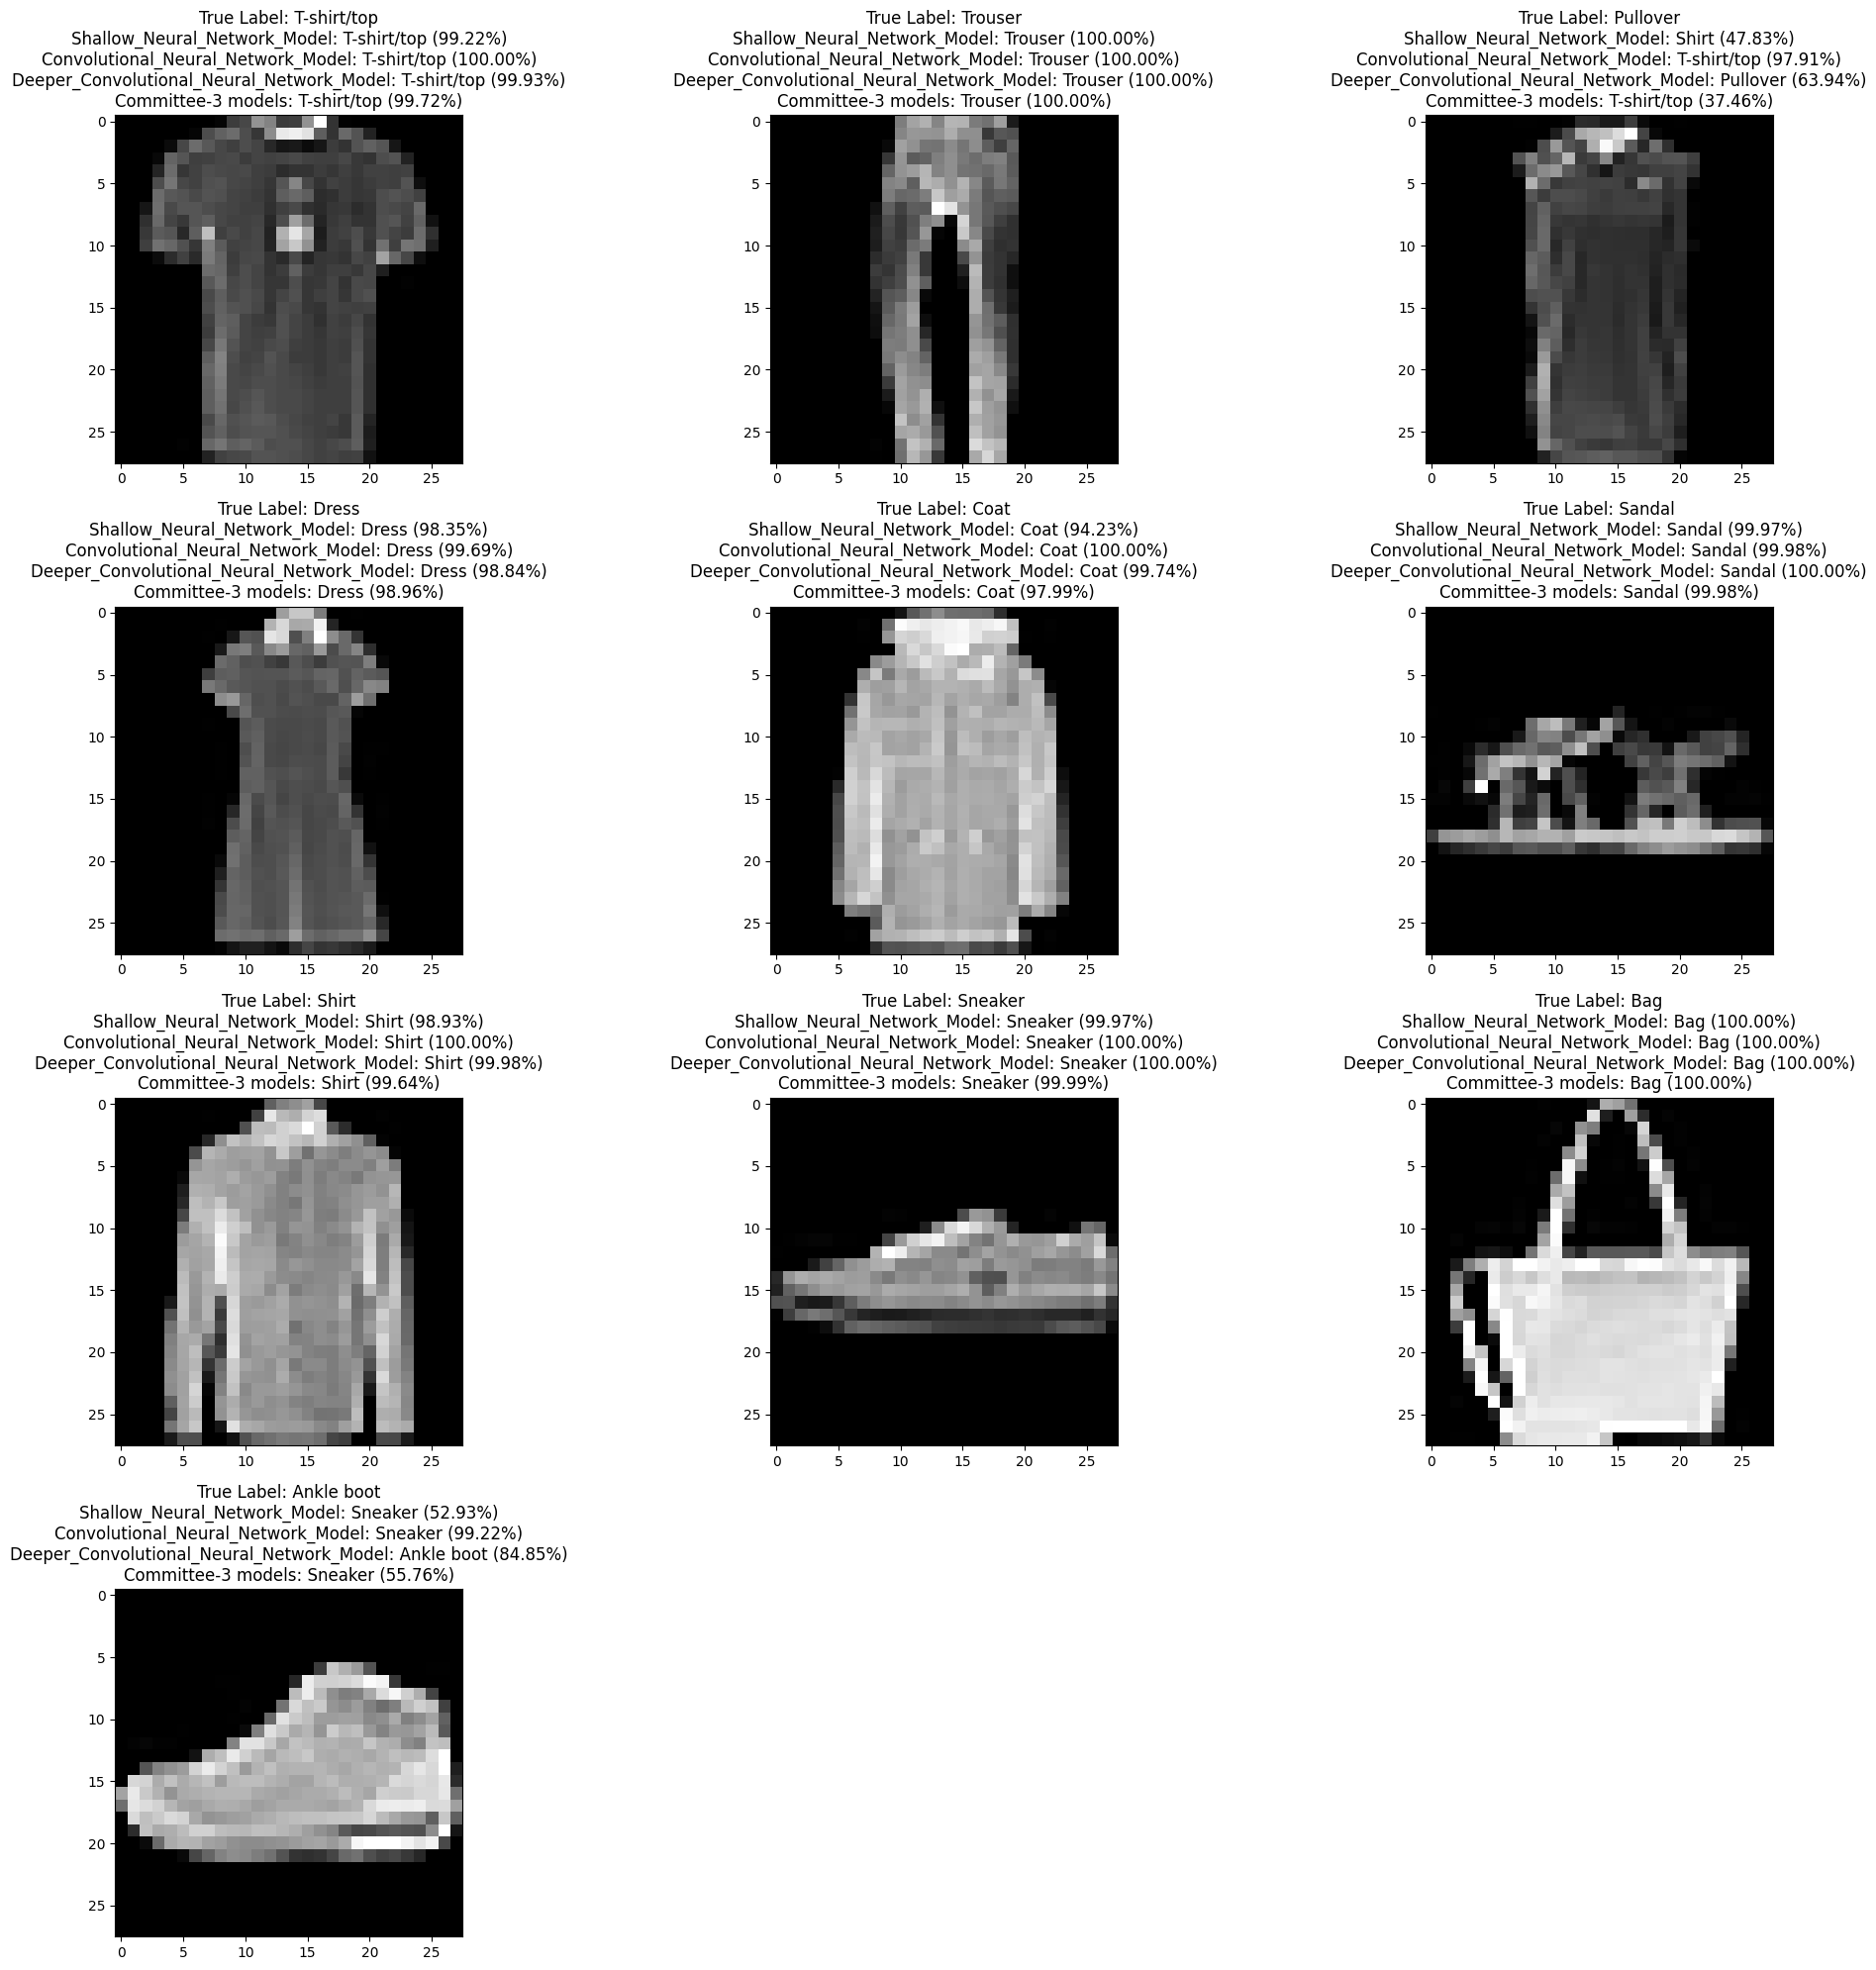

In [49]:
# Make the figures a bit bigger
plt.rcParams['figure.figsize'] = (20, 20)

# Assuming y_test contains the one-hot encoded class labels
unique_classes = np.unique(np.argmax(y_test, axis=1))
# Adjust the layout to accommodate all classes
rows = len(unique_classes) // 3 + (len(unique_classes) % 3 > 0)
cols = 3

# Plot random test images and evaluate models for each class
for i, class_label in enumerate(unique_classes):
    # Find the indices of the occurrences of the class_label
    indices = np.where(np.argmax(y_test, axis=1) == class_label)[0]
    # Randomly pick an index from the indices
    sample_index = np.random.choice(indices)
    sample_image = X_test[sample_index]
    sample_label = np.argmax(y_test[sample_index])

    # Get individual model predictions and confidence scores
    prediction_model_1_probs = shallow_neural_network_model.predict(np.expand_dims(sample_image, axis=0))
    prediction_model_1 = np.argmax(prediction_model_1_probs)
    confidence_model_1 = prediction_model_1_probs[0, prediction_model_1]

    prediction_model_2_probs = cnn_model.predict(np.expand_dims(sample_image, axis=0))
    prediction_model_2 = np.argmax(prediction_model_2_probs)
    confidence_model_2 = prediction_model_2_probs[0, prediction_model_2]

    prediction_model_3_probs = deeper_cnn_model.predict(np.expand_dims(sample_image, axis=0))
    prediction_model_3 = np.argmax(prediction_model_3_probs)
    confidence_model_3 = prediction_model_3_probs[0, prediction_model_3]
    prediction_committee = committee_labels[sample_index]

    confidence_committee = committee_predictions[sample_index, prediction_committee]

    # Plot the image
    plt.subplot(rows, cols, i + 1)
    plt.imshow(sample_image.reshape((28, 28)), cmap='gray', interpolation='none')
    plt.title(f"True Label: {class_names[sample_label]}\n"
            f"{shallow_neural_network_model.name}: {class_names[prediction_model_1]} ({confidence_model_1:.2%})\n"
            f"{cnn_model.name}: {class_names[prediction_model_2]} ({confidence_model_2:.2%})\n"
            f"{deeper_cnn_model.name}: {class_names[prediction_model_3]} ({confidence_model_3:.2%})\n"
            f"Committee-3 models: {class_names[prediction_committee]} ({confidence_committee:.2%})")

plt.tight_layout()
plt.show()
